# **Python for Data Science Assignment 1 - London Crime Analysis**

Fikri Fahreza

KS10-015


---

## **Download dataset**

In [1]:
# Install kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# Mount google colab dengan drive untuk mengambil API Kaggle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Download dataset dari kaggle
!kaggle datasets download -d jboysen/london-crime

london-crime.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Ekstrak zip
!unzip london-crime.zip

Archive:  london-crime.zip
replace london_crime_by_lsoa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: london_crime_by_lsoa.csv  


# **Pengenalan**
Halo! Nama saya Fikri Fahreza, ini adalah tugas pertama saya yang dipublikasi, tentang Analisis Kejahatan di London dengan menggunakan London Crime Dataset dari Kaggle.

Saya berharap dari tugas ini bisa menghasilkan *feedback* atau komentar tentang analisis ini.

LinkedIn: https://www.linkedin.com/in/fikri-fahreza/

# **Daftar isi:**


1.   [Konteks](#scrollTo=4F0a2HWnWfFT)
2.   [Data Preprocessing](#scrollTo=8Ac1ac3-pQnb)
3.   [Data Analysis](#scrollTo=gJr-USMtwTWw)
4.   [Kesimpulan](#scrollTo=u7mq6A9itf4Q)

---

# **1. Konteks**
Dataset ini merupakan catatan kejahatan di wilayah metropolitan besar, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, LSOA borough, dan kategori mayor/minor dari Jan 2008-Des 2016. Data ini berasal dari Kaggle, lebih tepatnya pada link berikut ini: https://www.kaggle.com/datasets/jboysen/london-crime

## **1.1. Atribut dari data**
* `lsoa_code`: Kode/ID untuk Lower Super Output Area (LSOA) di London Raya (mewakili area kepolisian).
* `borough`: Nama umum untuk wilayah London.
* `major_category`: Kategorisasi kejahatan utama
* `minor_category` : Kategorisasi kejahatan sub-utama (sub dari major_category)
* `value`: Jumlah kejahatan untuk wilayah tertentu, kategori tertentu dan bulan tertentu.
* `year`: Tahun laporan, 2008-2016
* `month`: Bulan laporan, 1-12

## **1.2. Tujuan analisis**

Merumuskan pertanyaan untuk menjawab pertanyaan terkait dan yang penting, memvisualisasikan data terkait.

## **1.3. Pertanyaan**

1. `Berapakah perubahan jumlah kejadian kejahatan dari tahun 2011 ke tahun 2016?`
2. `Apa 3 kejahatan teratas per wilayah pada tahun 2016?`
3. `Bagaimana jumlah setiap kategori kejahatan di tiap tahunnya?`
4. `Manakah kejahatan yang paling sering terjadi?`
5. `Bagaimana jumlah kejahatan yang terjadi di setiap bulannya?`
6. `Apakah ada kejahatan yang sangat ekstrem di bulan tertentu?`
7. `Sub-kategori kejahatan mana yang paling banyak`
8. `Wilayah manakah yang sering terjadi kejahatan?`
9. `Bulan apakah yang paling sedikit terjadi tindak kejahatan`



---



# **2. Data Preprocessing**

Pada bagian ini, kita akan melakukan import data, transformasi, dan lain sebagainya. Tujuannya agar data sudah siap kita olah, *yummy!*

## **2.1. Import data dan library**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [8]:
# Membaca CSV ke DataFrame
df = pd.read_csv("london_crime_by_lsoa.csv")

## **2.2. Memeriksa dan bersihkan data**

Kita akan memeriksa data, jika terdapat *missing values* atau terdapat bagian tidak sesuai dengan yang kita harapkan, maka bisa langsung kita bersihkan, untuk menghindari hasil analisa yang *bias* atau *unfair*. 

*Garbage In Garbage Out!*

In [9]:
# Menampilkan 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Berikut contoh data yang terdapat didalam dataset terkait.

In [10]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Ringkasan statistik untuk tipe data number. Tidak ada hal yang janggal disini. Namun, kita akan menyelam lebih dalam pada bagian selanjutnya.

In [11]:
df.describe(exclude="number")

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


Ringkasan statistik untuk tipe data object/categorical. Dalam ringkasan ini sudah sesuai dengan dokumentasi data, yang memberitahu bahwa data ini memiliki *33 LSOA boroughs, 9 major/ 32 minor category of crime from Jan 2008-Dec 2016.*

In [12]:
# Informasi terkait tipe data, nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Tipe data default sudah sesuai dengan yang diharapkan.

In [13]:
# Mencari null values dan menjumlahkannya
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Tidak ditemukan *NaN* atau *missing value*.



---



# **3. Data Analysis**

Pada bagian ini, kita akan menjawab pertanyaan bisnis yang terdapat di **Bagian 1.3.**

## **3.1. Berapakah perubahan jumlah kejadian kejahatan dari tahun 2011 ke tahun 2016?**

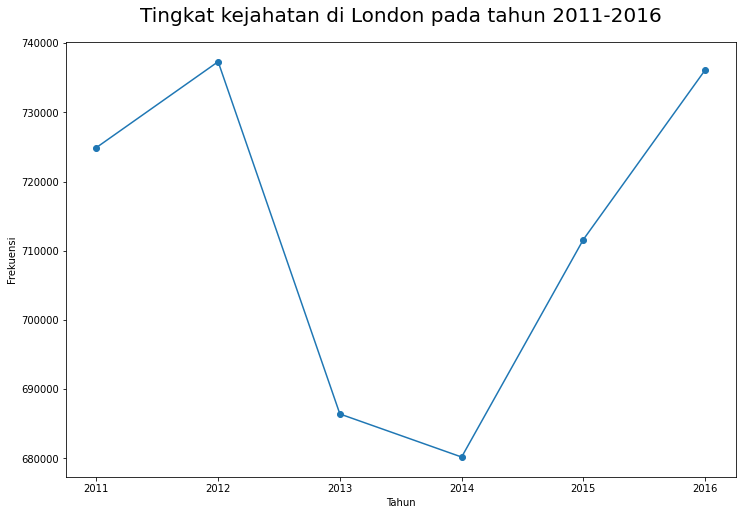

In [14]:
# Filtering kolom 'year'
mask = df["year"] >= 2011

# Membuat line chart
df[mask].groupby("year").agg("sum")["value"].plot(marker="o", figsize=(12,8))
plt.title("Tingkat kejahatan di London pada tahun 2011-2016", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.xlabel("Tahun")
plt.ylabel("Frekuensi");

Tidak ditemukan hal yang aneh disini, kecuali pada tahun 2013 hingga 2014 terdapat penurunan angka kejahatan dan naik kembali di tahun 2015. Usut punya usut, seperti yang dikutip dari British Broadcasting Corporation (BBC). Ternyata penurunan kejahatan tahun 2013-2014 dikaitkan dengan peningkatan "Big Wing Operations" - di mana staf di seluruh Metropolitan bergabung pada hari aksi untuk menargetkan (mengungkap kasus kejahatan) di area kejahatan tertentu.

## **3.2. Apa 3 kejahatan teratas per wilayah pada tahun 2016?**

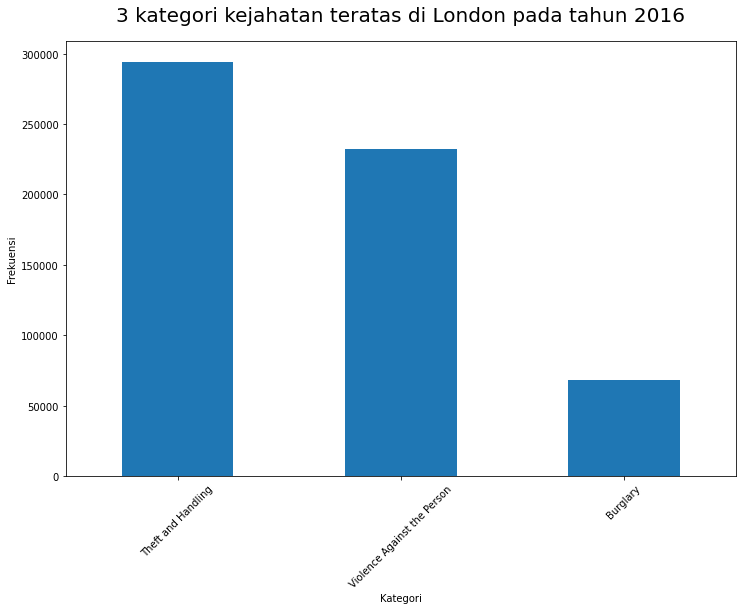

In [15]:
# Filtering kolom 'year'
mask = df["year"] == 2016

# Membuat bar chart
df[mask].groupby("major_category").agg("sum")["value"].sort_values(ascending=False).head(3).plot(kind="bar", figsize=(12,8))
plt.xticks(rotation=45)
plt.title("3 kategori kejahatan teratas di London pada tahun 2016", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.xlabel("Kategori")
plt.ylabel("Frekuensi");

Bisa kita lihat pada chart diatas bahwa, Theft and Handling adalah kategori kejahatan yang paling sering terjadi di London.

## **3.3. Bagaimana jumlah setiap kategori kejahatan di tiap tahunnya?**

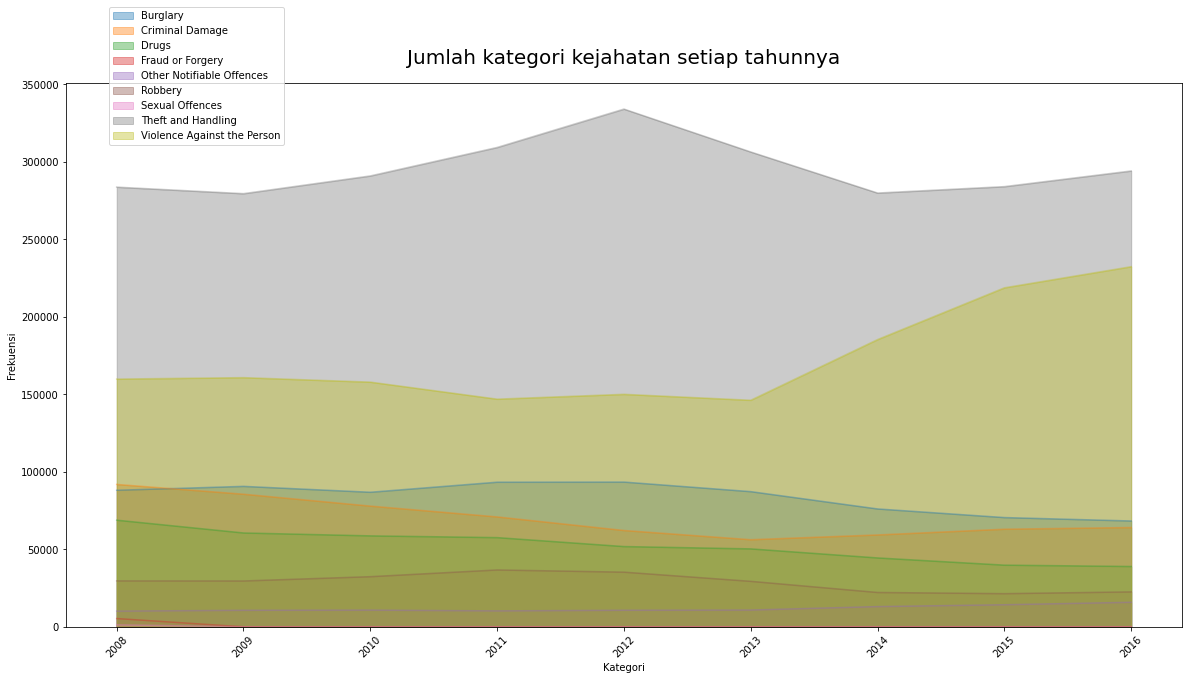

In [16]:
# Membuat area chart
df.pivot_table(index="year", columns="major_category", values="value", aggfunc="sum").plot(kind="area", stacked=False, alpha=0.4, figsize=(20,10))
plt.xticks(rotation=45)
plt.title("Jumlah kategori kejahatan setiap tahunnya", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.xlabel("Kategori")
plt.ylabel("Frekuensi")
plt.legend(bbox_to_anchor=(0.20, 1.15));

Seperti yang kita lihat bahwa Theft and Handling menjadi kategori kejahatan yang paling sering terjadi di London selama bertahun-tahun. Perlu dicatat juga bahwa ada tren peningkatan pada kategori kejahatan Violence Against the Person sejak tahun 2013. Itulah mengapa pada chart **Bagian 3.1.** tingkat kejahatan mengalami peningkatan kembali pada tahun 2015, setelah 2 tahun sebelumnya mengalami penurunan. Sedangkan untuk kategori kejahatan lainnya cenderung stabil.

## **3.4. Manakah kejahatan yang paling sering terjadi?**

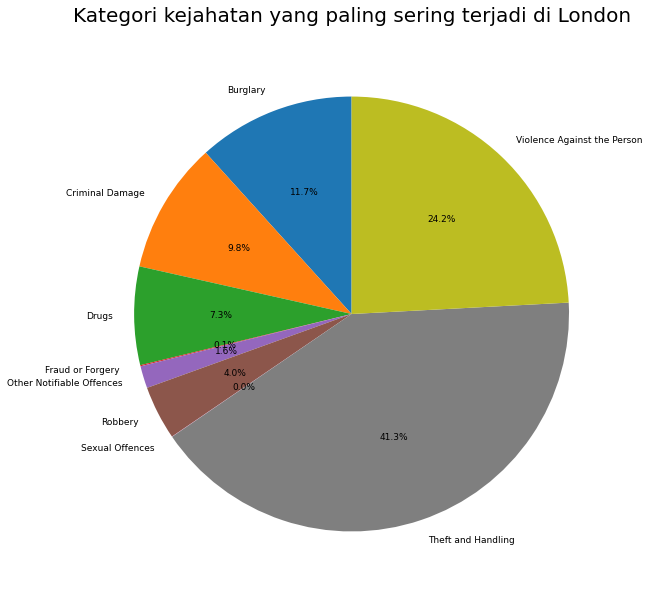

In [17]:
# Membuat pie chart
df.groupby("major_category").agg("sum")["value"].plot(kind="pie", figsize=(20,10), startangle=90, autopct="%1.1f%%", textprops={"fontsize":9})
plt.title("Kategori kejahatan yang paling sering terjadi di London", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.ylabel(None);

Sudah tidak heran bukan, jika Theft and Handling menjadi kategori kejahatan yang paling sering terjadi!

## **3.5. Bagaimana jumlah kejahatan yang terjadi di setiap bulannya?**

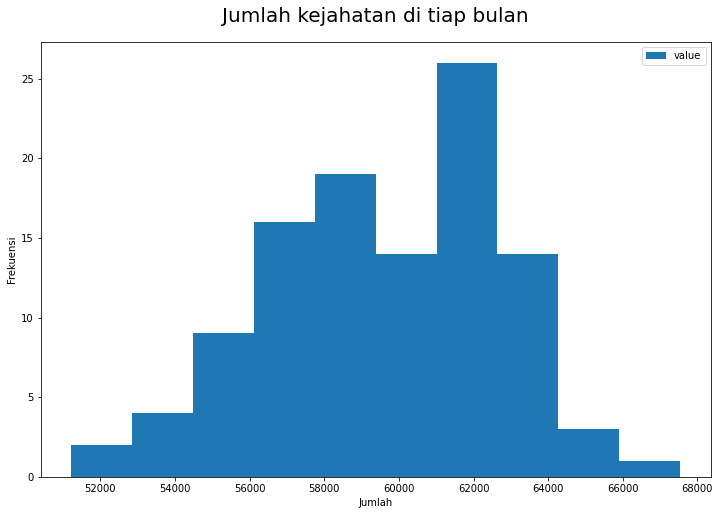

In [18]:
# Membuat histogram
df.pivot_table(index=["year","month"], values="value", aggfunc="sum").reset_index(drop=True).plot(kind="hist", figsize=(12,8))
plt.title("Jumlah kejahatan di tiap bulan", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.xlabel("Jumlah")
plt.ylabel("Frekuensi");

Dapat kita lihat pada histogram diatas memiliki data yang cenderung berdistribusi normal. Mari kita lihat pada bagian selanjutnya.

## **3.6. Apakah ada kejahatan yang sangat ekstrem di bulan tertentu?**

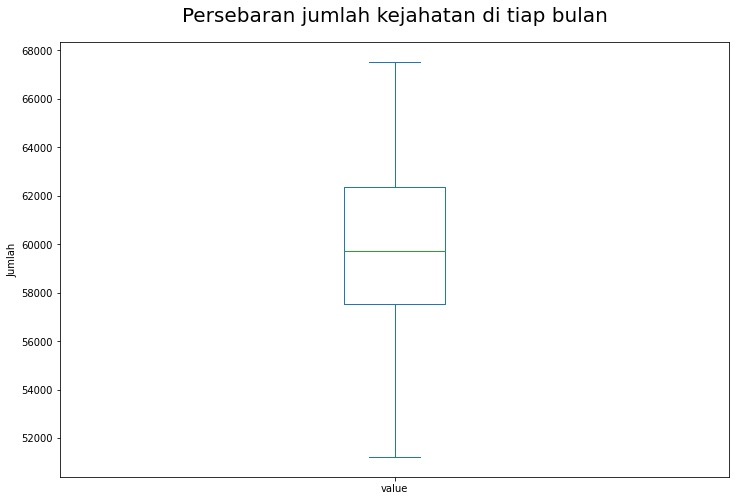

In [19]:
# Membuat box plot
df.pivot_table(index=["year","month"], values="value", aggfunc="sum").reset_index(drop=True).plot(kind="box", figsize=(12,8))
plt.title("Persebaran jumlah kejahatan di tiap bulan", fontname=["sans-serif", "Helvetica"], fontsize=20, pad=20)
plt.ylabel("Jumlah");

Dari sini kita bisa melihat dengan jelas bahwa setiap bulannya, tidak ada peningkatan atau penurunan kejahatan yang sangat ekstrem. Di tiap bulannya itu cenderung stabil. Maka dari itu kita mempunyai distribusi yang normal.

## **3.7. Sub-kategori kejahatan mana yang paling banyak?**

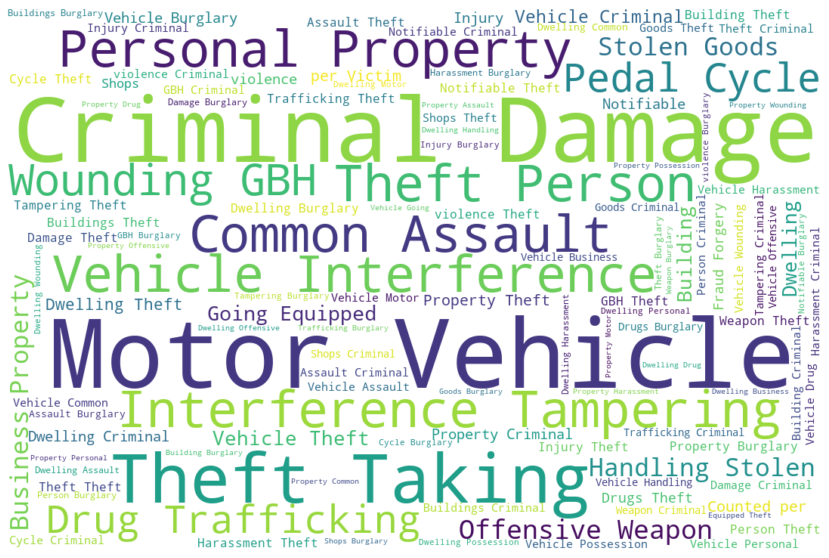

In [20]:
# Membuat word clouds
stopwords = set(STOPWORDS)
wc_model = WordCloud(background_color="white", width=1080, height=720, max_words=120, stopwords=stopwords).generate((" ").join(df["minor_category"]))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc_model, interpolation="bilinear");

Dapat dilihat bahwa sub-kategori yang paling menonjol disini itu Criminal Damage dan Motor Vehicle (Theft and Handling)

## **3.8. Wilayah manakah yang sering terjadi tindak kejahatan?**

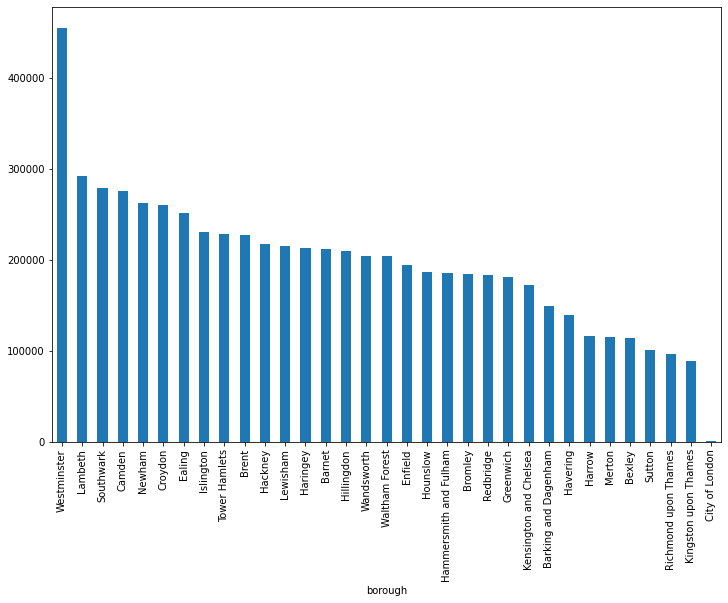

In [21]:
# Membuat bar chart
df.groupby("borough").agg("sum")["value"].sort_values(ascending=False).plot(kind="bar", figsize=(12,8))

Westminster menjadi wilayah yang paling mencolok disini dengan tingkat kejahatan yang paling tinggi dibandingkan wilayah lain, dan City of London menjadi wilayah paling aman dengan tingkat kejahatan paling rendah.

## **3.9. Bulan apakah yang paling sedikit terjadi tindak kejahatan?**

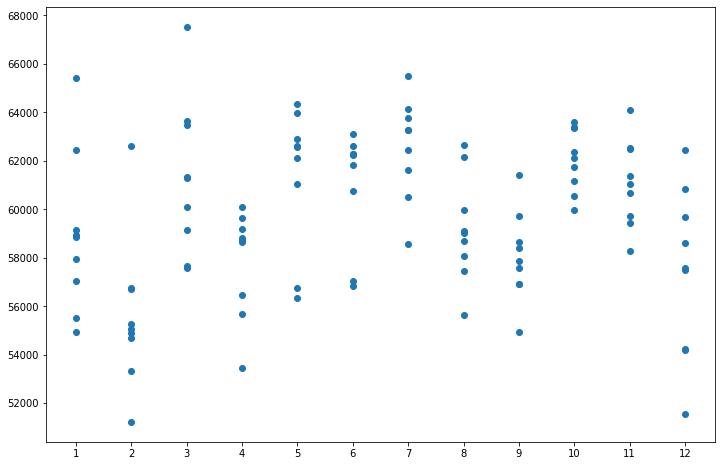

In [22]:
# Membuat scatter plot
scatplot = df.groupby(["year", "month"]).agg("sum")[["value"]].reset_index()
plt.figure(figsize=(12,8))
plt.scatter(x=scatplot["month"], y=scatplot["value"])
plt.xticks(range(1,13));

Dapat dilihat bahwa tingkat kejahatan mencapai titik terendahnya di bulan Februari dan Desember.

---

# **4. Kesimpulan**

1. Theft and Handling adalah kategori kejahatan yang paling sering terjadi di London. 
2. Jumlah Violence Against the Person meningkat dalam beberapa tahun terakhir.
3. Kategori kejahatan selain Theft and Handling dan Violence Against the Person cenderung stabil di tiap tahunnya.
4. Westminster menjadi wilayah yang paling rawan terjadinya tindak kejahatan.
5. City of London menjadi wilayah paling aman.
6. Februari dan Desember menjadi bulan yang jarang terjadi kejahatan dibandingkan bulan-bulan lainnya.

Tetapi, dibutuhkan analisis yang lebih lanjut dan dalam untuk menemukan insight menarik lainnya. Apakah ada faktor sosial atau faktor alam? *Who knows?*

---
Sekian dari saya terima kasih!

Salam hormat,

Fikri Fahreza